In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# for benchmarks

# on 18000 frame episodes, average of 10 episodes
soloRandomScores = {
     'Alien-v0': 164.0,'Asteroids-v0': 815.0,'Atlantis-v0': 21100.0,'BankHeist-v0': 17.0,
     'BattleZone-v0': 3300.0,'Bowling-v0': 20.2,'Boxing-v0': 2.4,'Centipede-v0': 2229.7,
     'ChopperCommand-v0': 660.0,'DoubleDunk-v0': -19.2,'FishingDerby-v0': -92.2,
     'Freeway-v0': 0.0,'Frostbite-v0': 53.0,'Gravitar-v0': 310.0,'Hero-v0': 1217.5,
     'IceHockey-v0': -10.9,'Jamesbond-v0': 25.0,'Kangaroo-v0': 60.0,'Krull-v0': 1479.8,
     'KungFuMaster-v0': 760.0,'MsPacman-v0': 246.0,'PrivateEye-v0': 40.0,
     'RoadRunner-v0': 20.0, 'Skiing-v0': -16270.7, 'Tennis-v0': -24.0,'TimePilot-v0': 3190.0,
     'UpNDown-v0': 422.0,'Venture-v0': 0.0,'WizardOfWor-v0': 750.0,'Zaxxon-v0': 0.0}

soloTpgScores = {
     'Alien-v0': 3382.7,'Asteroids-v0': 3050.7,'Atlantis-v0': 89653,'BankHeist-v0': 1051,
     'BattleZone-v0': 47233.4,'Bowling-v0': 223.7,'Boxing-v0': 76.5,'Centipede-v0': 34731.7,
     'ChopperCommand-v0': 7070,'DoubleDunk-v0': 2,'FishingDerby-v0': 49,
     'Freeway-v0': 28.9,'Frostbite-v0': 8144.4,'Gravitar-v0': 786.7,'Hero-v0': 16545.4,
     'IceHockey-v0': 10,'Jamesbond-v0': 3120,'Kangaroo-v0': 14780,'Krull-v0': 12850.4,
     'KungFuMaster-v0': 43353.4,'MsPacman-v0': 5156,'PrivateEye-v0': 15028.3,
     'RoadRunner-v0': 17410, 'Skiing-v0': 0, 'Tennis-v0': 1,'TimePilot-v0': 13540,
     'RoadRunner-v0': 17410,'Tennis-v0': 0,'TimePilot-v0': 13540,
     'UpNDown-v0': 34416,'Venture-v0': 576.7,'WizardOfWor-v0': 5196.7,'Zaxxon-v0': 6233.4}

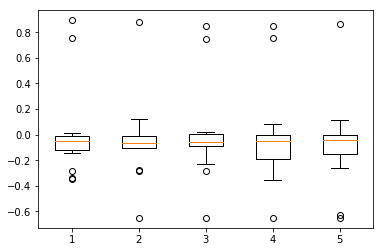

In [3]:
df = pd.read_csv('15-shrink-novir.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==120]

df.head()

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(4,19):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.show()

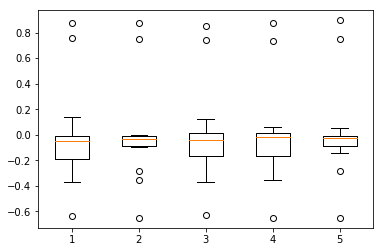

In [4]:
df = pd.read_csv('15-shrink-vir.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==300]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(4,19):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.show()

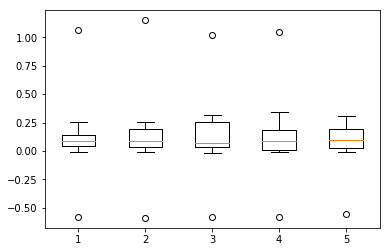

In [20]:
df = pd.read_csv('8-all-at-once.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==150]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.show()

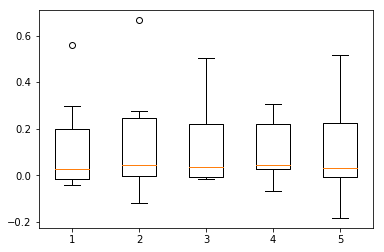

In [7]:
df = pd.read_csv('8-all-at-once-window-2.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==150]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.show()

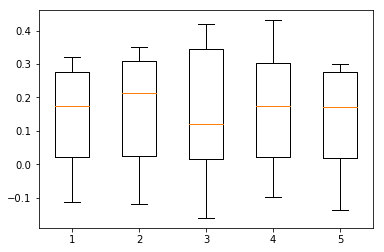

In [5]:
df = pd.read_csv('8-all-at-once-window-4.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==150]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.show()

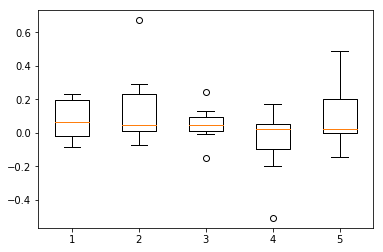

In [22]:
df = pd.read_csv('8-merge.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==100]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.show()

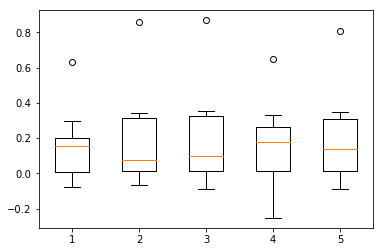

In [6]:
df = pd.read_csv('8-merge-window-4.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==150]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.show()